# Logistic Regression


## Table of Contents:
1. [Background reading](#background-reading)
2. [Dataset](#dataset)
3. [Essence of Data](#essence-of-data)
    
    3.1 [Examples of application](#examples-of-application)
    
    3.2 [Example Codes](#example-codes)
        
        
4. [AI in the fabric of society](#ai-in-the-fabric-of-society)


## Background reading:

**Suggested Reading**:

*Intro to Statistical Learning*: 4.3 Logistic Regression, 4.3.4 Multiple Logistic Regression

*Ethical Algorithm*: Chapter 3, Games People Play, The Dating Game, (Page 94-97)

**Optional Reading**:

*Intro to Statistical Learning*: 4.3.5 Multinomial Logistic Regression, 4.4.2 Linear Discriminant Analysis (explains specification, specificity, and ROC curve)

## Dataset:
The example on github uses the social network advertising clicks database from kaggle
Link: https://www.kaggle.com/jahnveenarang/cvdcvd-vd?select=Social_Network_Ads.csv 

Attribute columns:
1. User ID
2. Gender - male or female
3. Age
4. Estimated Salary
5. Gender Binary (Male = 1 and Female = 0)
6. Purchased (User clicked on the ad and purchased = 1, user did not click on the ad = 0)

The class being used for our target prediction class is “Purchased” 


## Essence of Data:

**What is logistic regression?**
Logistic regression is a supervised machine learning algorithm that is used for classification.

There are two types of logistic regression
Binary logistic regression (ie. patient has diabetes or patient does not have diabetes)
Multi-linear functions (ie. freshman, sophomore, junior, senior)

**How does logistic regression work?**
Article: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

The predicted Y value lies within the range of 0 and 1.
If we have two possible class values then we must set a threshold value, where all values above this threshold are assigned to one class and all values below the threshold to the other class. Typically we would choose a value of 0.5. Any unique user ID with a probability below 0.5 will be assigned to whichever class is 0 and any unique user ID with a probability above 0.5 will be assigned a class value of 1.

The equation that logistic regression classifier uses when there are multiple predictors and a set of binary classifications. The sigmoid function is used to map predictions from probabilities.

Graph here shows the shape of **sigmoid function**
*The function of sigmoid: $S(x) = \frac{1}{1+e^{-x}}$*

![](../../../fig/Logistic/fig1.png)

<div align = 'center'><font size = '10'>$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}$</font></div>

<div align = 'center'><font size = '10'>$\log\frac{p(X)}{1-p(X)}=\beta_0+\beta_1X$</font></div>

<div align = 'center'><font size = '10'>$\hat{p}(X)=\frac{e^{\hat{\beta}_0+\hat{\beta}_1X}}{1+e^{\hat{\beta}_0+\hat{\beta}_1X}}$</font></div>

<div align = 'center'><font size = '10'>$\log\frac{p(X)}{1-p(X)}=\beta_0+\beta_1X_1+...+\beta_pX_p$</font></div>

<div align = 'center'><font size = '10'>$p(X) = \frac{e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}{1+e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}$</font></div>




### Examples of application?
**Article:** 

https://www.forbes.com/sites/forbesbusinesscouncil/2022/01/18/how-machine-learning-is-shaping-the-future-of-advertising/?sh=7bf8d1f51361 

**Article about possible targeted ads being used to discriminate against disabled people and minorities in housing and political candidates using “dark ads” to target groups:**

https://www.ama.org/marketing-news/the-ethics-of-targeting-minorities-with-dark-ads/
https://hbr.org/2019/11/how-targeted-ads-and-dynamic-pricing-can-perpetuate-bias 

Logistic regression can be used to predict disease survival prediction, natural language processing tasks, sentiment analysis, and fraudulent transactions. It is commonly for targeted advertising by e-commerce retailers, political marketing campaigns, banks/credit card companies, and advertising companies.
Possible ethical issues include targeting by exclusion and “dark ads”
What groups (age, gender, income, education level) should these companies show advertisements towards in order to increase sales and support?

This ties back to exploration vs. exploitation. When it comes to advertising a company does not want to spend money on ads for groups who are not already designated as good “target groups” (typically done through market research). They will want to exploit what they already know about groups who are likely to become customers and target their advertisements towards these groups in order to drive sales.


### Example Codes

In [237]:
import pandas as pd  # data manipulation and analysis library for handling structured data (like data frames, tables)
import math # built-in library, which provides mathematical functions such as exponentiation, logarithms, trigonometry, etc
import random  # provides functions for generating random numbers and performing random selections
import numpy as np # library for handling arrays and numerical operations
import seaborn as sns  # statistical data visualization library used to create histograms, boxplots, and heatmaps
import matplotlib.pyplot as plt # plotting library used to create line plots, scatter plots, histograms, and bar plots
from sklearn.model_selection import train_test_split  # split a dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # used to create a logistic regression model
from sklearn import metrics  # used to evaluate models include accuracy, precision, confusion matrix

In [239]:
#Load the dataset and columns of interest
addataset = 'SocialNetworkAdClicks.csv'
df_addataset = pd.read_csv(addataset, usecols = ['User ID','Age','EstimatedSalary','GenderBinary','Purchased'])

In [241]:
#checking dataset for null values
df_addataset.isna().sum()  # checking missing values in each column 

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
GenderBinary       0
dtype: int64

In [243]:
#dataset descriptive statistics
df_addataset.describe()  # a summary of the statistical characteristics of the numeric columns

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

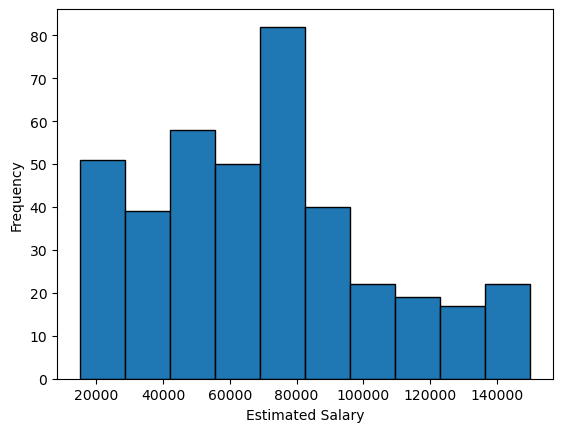

In [245]:
plt.hist(df_addataset['EstimatedSalary'], edgecolor='black')

Text(0, 0.5, 'Frequency')

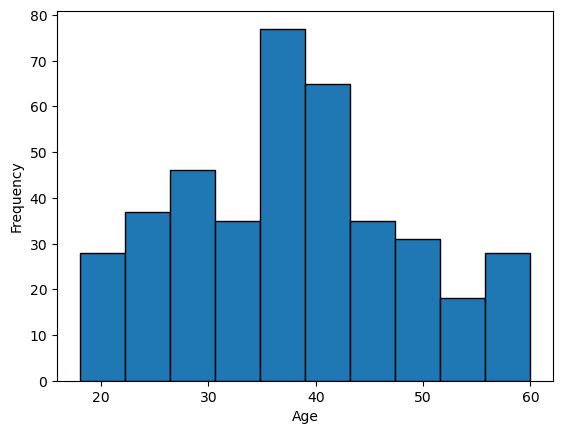

In [247]:
plt.hist(df_addataset['Age'], edgecolor='black')

In [249]:
#show the head of the dataset
df_addataset.head()  # displays the first 5 rows by default

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [251]:
#identify which columns are our predictors and which is our target 
feature_cols= ['GenderBinary','Age'] 
predictors = df_addataset[feature_cols] 
target = df_addataset.Purchased  

In [253]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.2)  # 20% of the dataset allocated in test set

In [255]:
#initiate logistic regression model
logreg = LogisticRegression()
#fit the model to the training data
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [259]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy))

Accuracy of the Logistic Regression Model: 77.5%


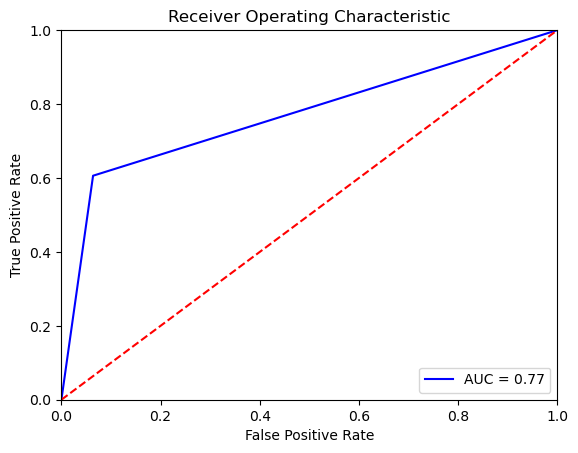

In [121]:
#create ROC Curve
# If you are confused with ROC Curve, go below to see the concept
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [127]:
#true positive rate numbers (you can print the FPR also)
tpr

array([0.        , 0.60606061, 1.        ])

In [129]:
# ROC Area Under the Curve
roc = metrics.roc_auc_score(y_test,y_pred)*100
print('Area Under the curve accuracy score is: {0}%'.format(roc))

Area Under the curve accuracy score is: 77.11154094132817%


In [131]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[44,  3],
       [13, 20]])

Text(0.5, 427.9555555555555, 'Predicted Class')

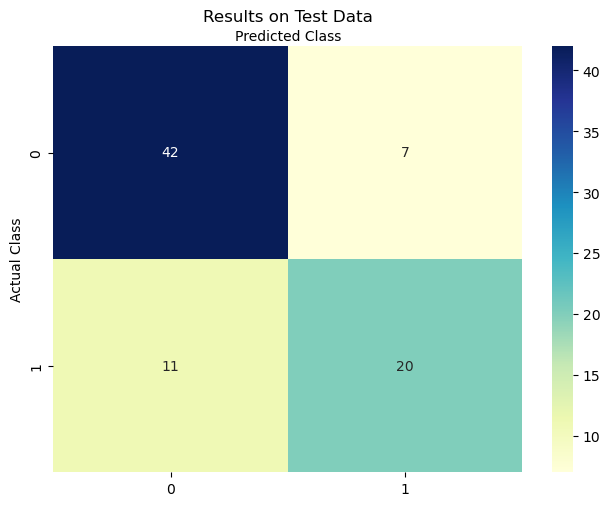

In [73]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')



# Now time to code!

### add iris.csv data provided on repository to your data folder

### Check what we did with Adclick data and model fitting

### Apply what you saw here on Adclick data to iris one



## The only hint you may need is to how to convert string into categorical

## df['variety']= pd.Categorical(df["variety"]).codes










### Now to plot ROC curve we have here multiple classes 
### which's not the same case as it were in the previous example, hence, we need to make an encoding special to this called one hot encoding
### we have class 0,1,2 we will make each one of them as an array of size 3 where zero -> [1,0,0], 1 -> [0,1,0] and 2 -> [0,0,1]
more information: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html


In [200]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_pred = label_binarizer.transform(y_pred)

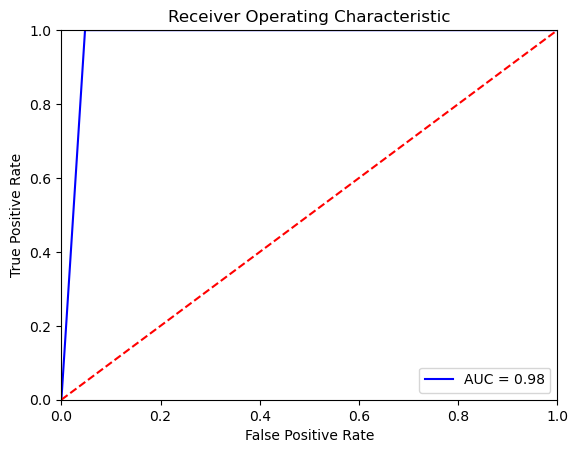

In [202]:
#create ROC Curve
# plotting the ROC for reference of class 1
class_id = 1
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_onehot_test[:,class_id], y_onehot_pred[:,class_id])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [204]:
print(tpr,fpr)

[0. 1. 1.] [0.         0.04761905 1.        ]
